In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

In [54]:
df=pd.read_csv("../data/final/InputFile.csv")
df.head()

,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [55]:
df.dtypes

Cement                             float64
Blast Furnace Slag _component_2    float64
Fly Ash _component_3               float64
Water_component_4                  float64
Superplasticizer_component_5       float64
Coarse Aggregate_component_6       float64
Fine Aggregate_component_7         float64
Age_day                              int64
Concrete_compressive _strength     float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Cement                           1030 non-null   float64
 1   Blast Furnace Slag _component_2  1030 non-null   float64
 2   Fly Ash _component_3             1030 non-null   float64
 3   Water_component_4                1030 non-null   float64
 4   Superplasticizer_component_5     1030 non-null   float64
 5   Coarse Aggregate_component_6     1030 non-null   float64
 6   Fine Aggregate_component_7       1030 non-null   float64
 7   Age_day                          1030 non-null   int64  
 8   Concrete_compressive _strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [51]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

C:\Home\Git\cementstrength\venv\lib\site-packages\pandas\io\formats\style.py:2817: RuntimeWarning: invalid value encountered in double_scalars
  norm = colors.Normalize(smin - (rng * low), smax + (rng * high))


,count,mean,std,min,25%,50%,75%,max
Cement,1030.000000,281.167864,104.506364,102.000000,192.375000,272.900000,350.000000,540.000000
Blast Furnace Slag _component_2,1030.000000,73.895825,86.279342,0.000000,0.000000,22.000000,142.950000,359.400000
Fly Ash _component_3,1030.000000,54.188350,63.997004,0.000000,0.000000,0.000000,118.300000,200.100000
Water_component_4,1030.000000,181.567282,21.354219,121.800000,164.900000,185.000000,192.000000,247.000000
Superplasticizer_component_5,1030.000000,-inf,nan,-inf,nan,1.856298,2.322388,3.471966
Coarse Aggregate_component_6,1030.000000,972.918932,77.753954,801.000000,932.000000,968.000000,1029.400000,1145.000000
Fine Aggregate_component_7,1030.000000,773.580485,80.175980,594.000000,730.950000,779.500000,824.000000,992.600000
Age_day,1030.000000,3.165326,1.191450,0.000000,1.945910,3.332205,4.025352,5.899897
Concrete_compressive _strength,1030.000000,35.817961,16.705742,2.330000,23.710000,34.445000,46.135000,82.600000


Check for null values

In [7]:
df.isnull().sum()

Cement                             0
Blast Furnace Slag _component_2    0
Fly Ash _component_3               0
Water_component_4                  0
Superplasticizer_component_5       0
Coarse Aggregate_component_6       0
Fine Aggregate_component_7         0
Age_day                            0
Concrete_compressive _strength     0
dtype: int64

Seems there are no null values

<AxesSubplot:>

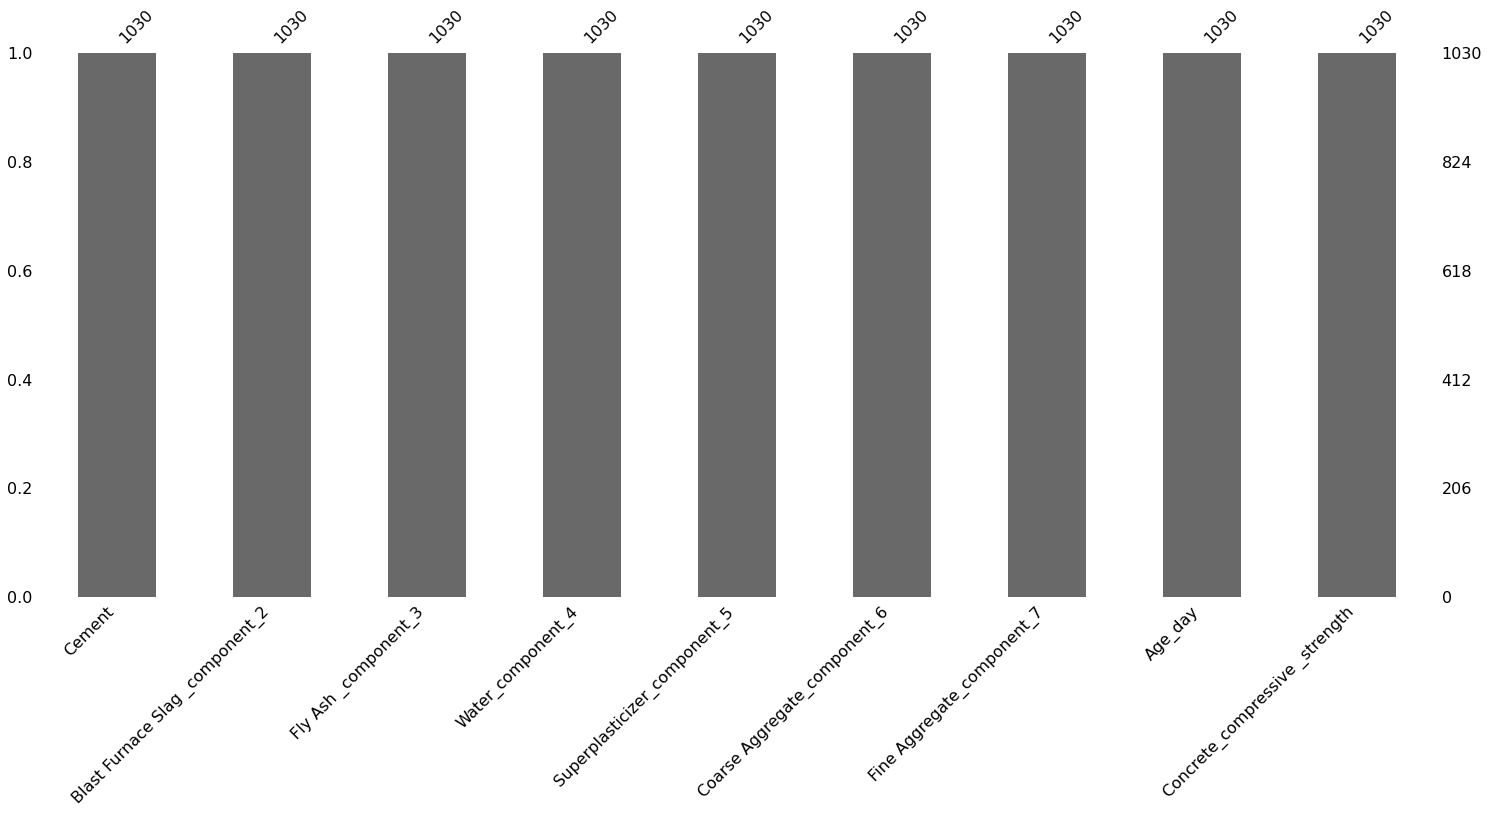

In [9]:
msno.bar(df)

Visualize the distribution of data for all features

C:\Home\Git\cementstrength\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Home\Git\cementstrength\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Home\Git\cementstrength\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

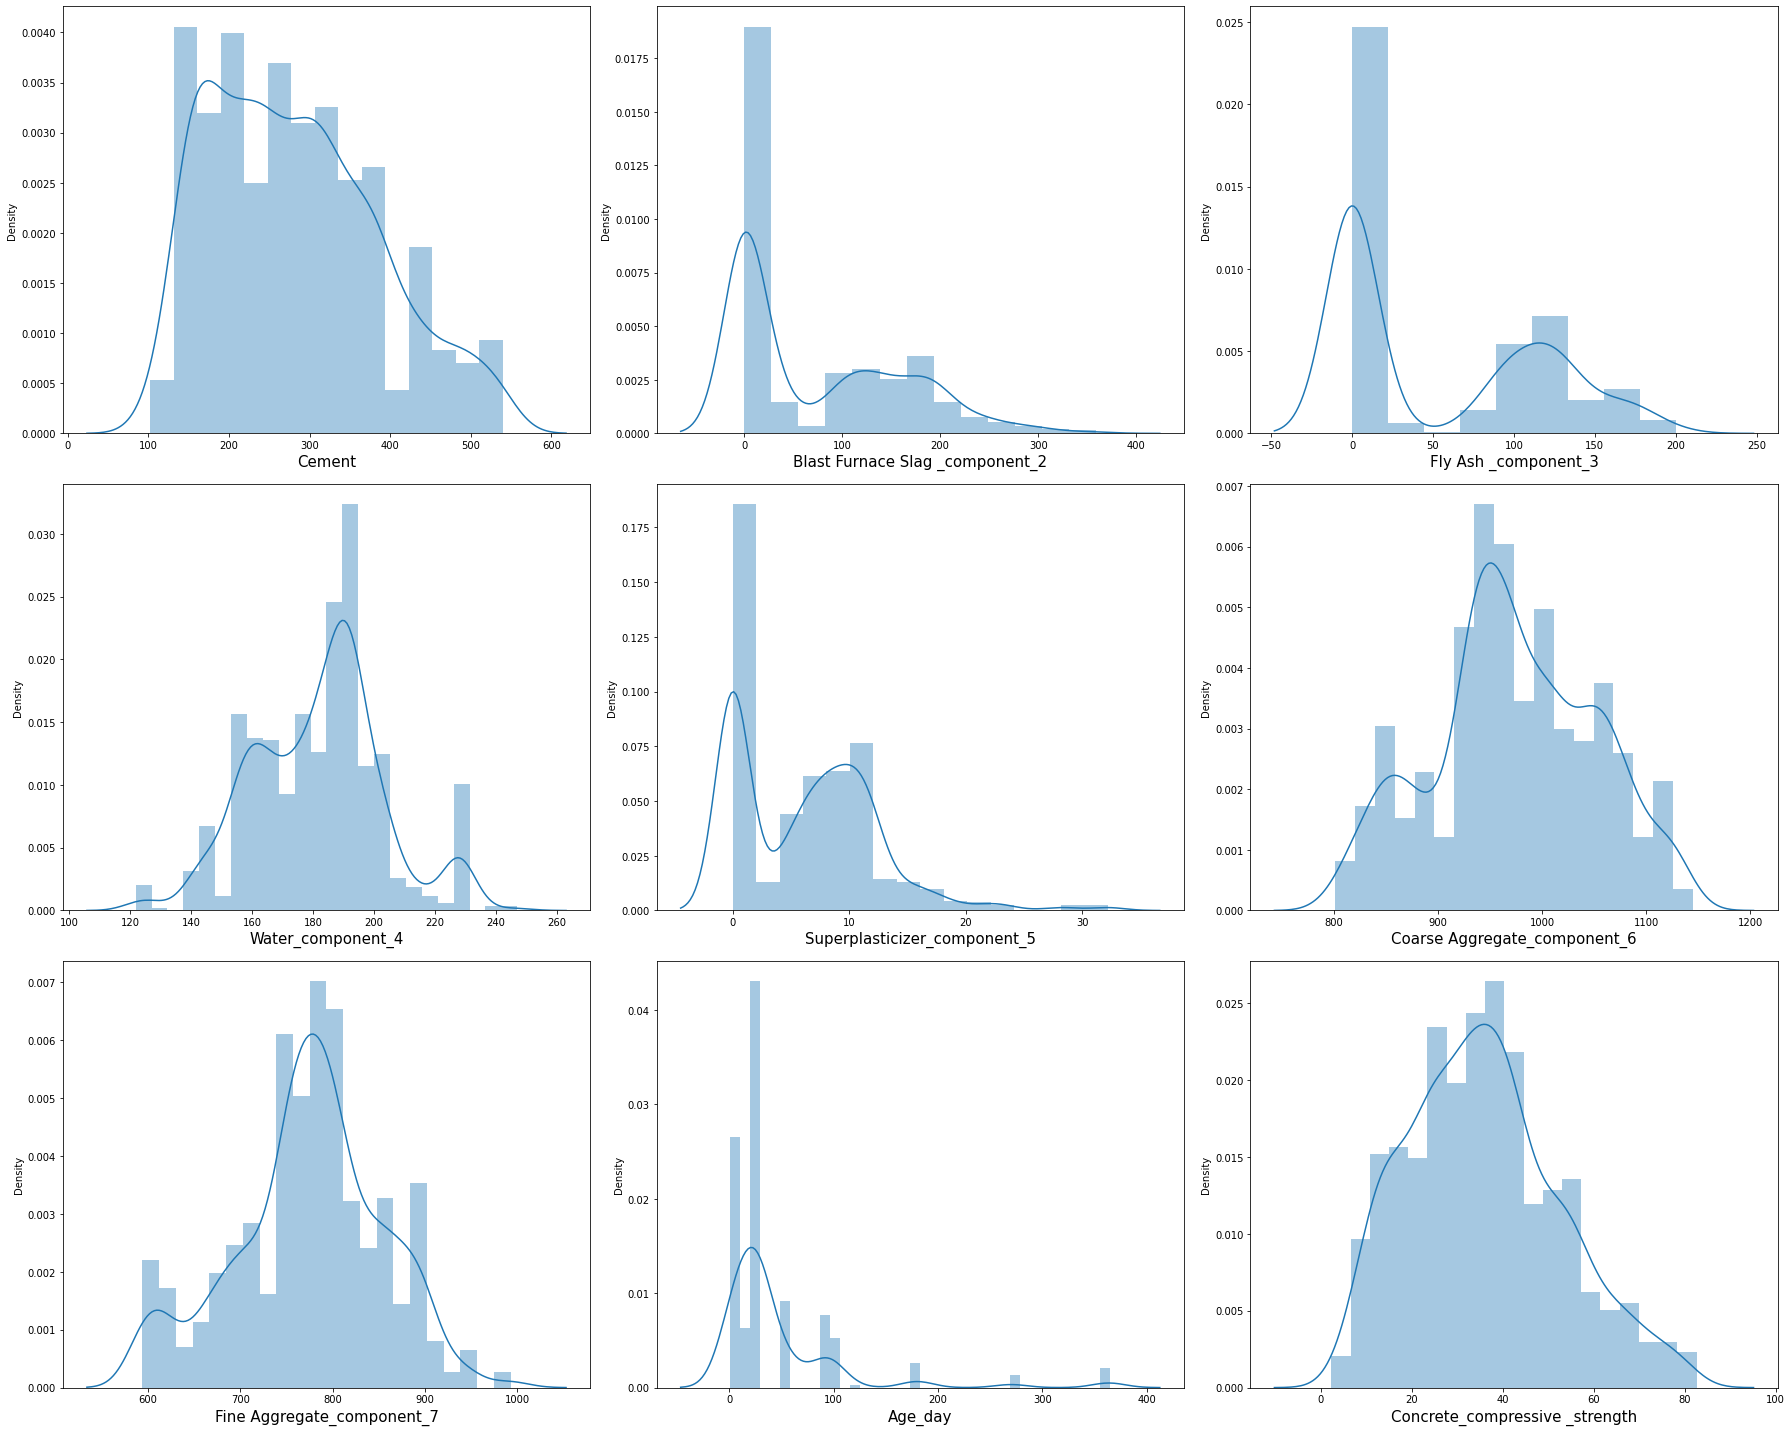

In [12]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= len(df.columns):
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)

    plotnumber += 1

plt.tight_layout()
plt.show()

The features are not necessarily in normal distribution.Log transformation might be a way to normalize these

Check relation between independent and depednent features

In [16]:
df_corr=df[df.columns[0:]].corr()['Concrete_compressive _strength'][:].sort_values(ascending=False)
df_corr

Concrete_compressive _strength     1.000000
Cement                             0.497832
Superplasticizer_component_5       0.366079
Age_day                            0.328873
Blast Furnace Slag _component_2    0.134829
Fly Ash _component_3              -0.105755
Coarse Aggregate_component_6      -0.164935
Fine Aggregate_component_7        -0.167241
Water_component_4                 -0.289633
Name: Concrete_compressive _strength, dtype: float64

There seems to be correlation between all features and the target column

Check the scatterplot between features

In [13]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

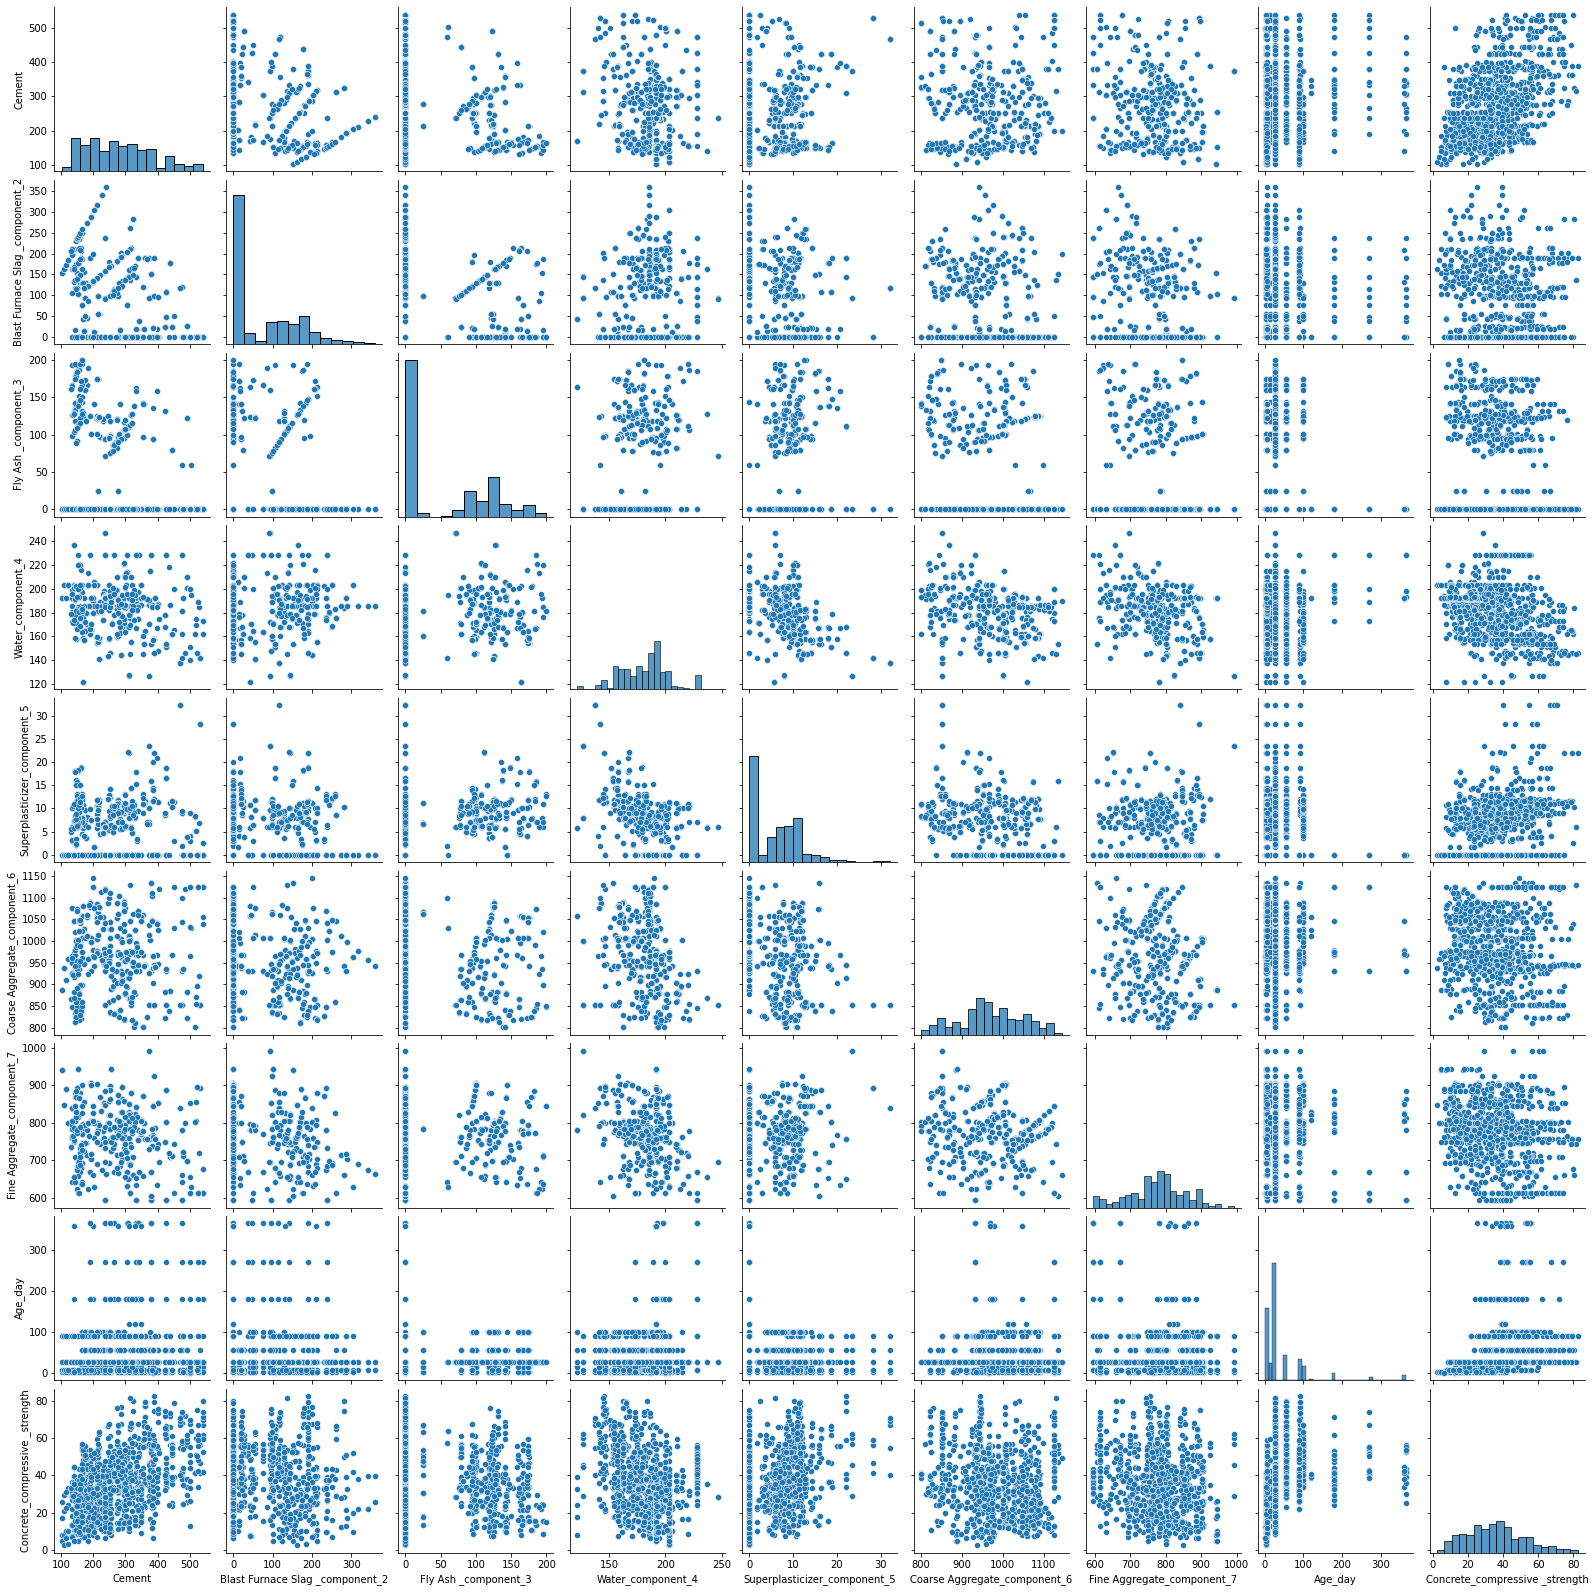

In [20]:
sns.pairplot(df)

In [22]:
corr = df.corr()
# Fill diagonal and upper half with NaNs
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='coolwarm', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

C:\Temp\ipykernel_82032\3478387883.py:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (corr


,Cement,Blast Furnace Slag _component_2,Fly Ash _component_3,Water_component_4,Superplasticizer_component_5,Coarse Aggregate_component_6,Fine Aggregate_component_7,Age_day,Concrete_compressive _strength
Cement,nan,nan,nan,nan,nan,nan,nan,nan,nan
Blast Furnace Slag _component_2,-0.28,nan,nan,nan,nan,nan,nan,nan,nan
Fly Ash _component_3,-0.40,-0.32,nan,nan,nan,nan,nan,nan,nan
Water_component_4,-0.08,0.11,-0.26,nan,nan,nan,nan,nan,nan
Superplasticizer_component_5,0.09,0.04,0.38,-0.66,nan,nan,nan,nan,nan
Coarse Aggregate_component_6,-0.11,-0.28,-0.01,-0.18,-0.27,nan,nan,nan,nan
Fine Aggregate_component_7,-0.22,-0.28,0.08,-0.45,0.22,-0.18,nan,nan,nan
Age_day,0.08,-0.04,-0.15,0.28,-0.19,-0.00,-0.16,nan,nan
Concrete_compressive _strength,0.50,0.13,-0.11,-0.29,0.37,-0.16,-0.17,0.33,nan


No correlated features

In [23]:
from scipy import stats
z = np.abs(stats.zscore(df))
threshold = 3
print(np.where(z > 3))
arr1,arr2=np.where(z > 3)
len(arr1)

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


49

In [25]:
df.shape

(1030, 9)

In [24]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_correlation=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
print(df_correlation.shape)

(941, 9)


Limited number of outliers are present

In [46]:
df.skew()

Cement                             0.509481
Blast Furnace Slag _component_2    0.800717
Fly Ash _component_3               0.537354
Water_component_4                  0.074628
Superplasticizer_component_5            NaN
Coarse Aggregate_component_6      -0.040220
Fine Aggregate_component_7        -0.253010
Age_day                           -0.151351
Concrete_compressive _strength     0.416977
dtype: float64

<AxesSubplot:xlabel='Age_day', ylabel='Density'>

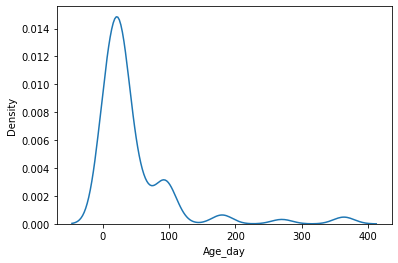

In [27]:
sns.kdeplot(df.Age_day)

((array([-3.20610174, -2.94154129, -2.79394753, ...,  2.79394753,
          2.94154129,  3.20610174]),
  array([0.        , 0.        , 1.09861229, ..., 5.89989735, 5.89989735,
         5.89989735])),
 (1.148443902553854, 3.165325929660111, 0.9617614110907525))

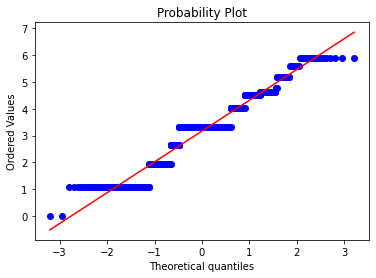

In [36]:
import scipy.stats as stats
import pylab
stats.probplot(df.Age_day,plot=pylab)

In [33]:
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

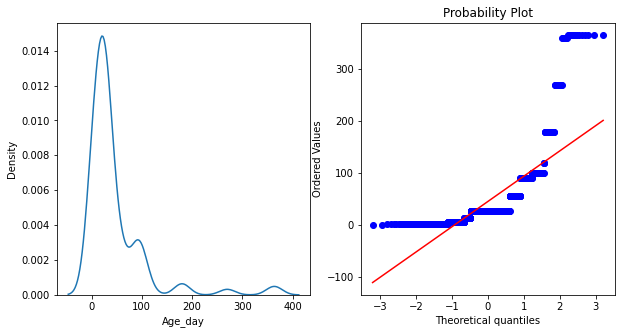

In [34]:
normality(df,'Age_day')

C:\Home\Git\cementstrength\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Home\Git\cementstrength\venv\lib\site-packages\numpy\lib\function_base.py:2674: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


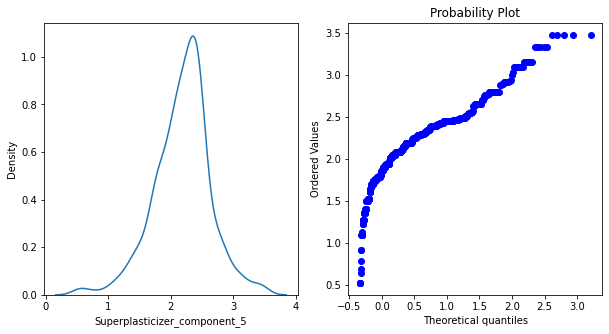

In [45]:
df['Superplasticizer_component_5']=np.log(df['Superplasticizer_component_5'])
normality(df,'Superplasticizer_component_5')

In [40]:
df['Age_day'].values

array([3.33220451, 3.33220451, 5.59842196, ..., 3.33220451, 3.33220451,
       3.33220451])

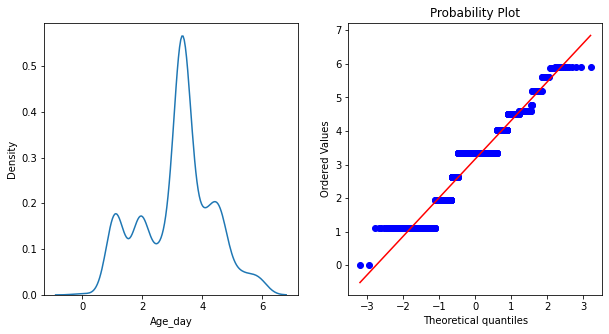

In [43]:
from scipy.special import boxcox1p
df_boxcox = df.apply(lambda x: boxcox1p(x,0.25))
normality(df,'Age_day')

In [14]:
X.var()

Cement                             10921.580220
Blast Furnace Slag _component_2     7444.124812
Fly Ash _component_3                4095.616541
Water_component_4                    456.002651
Superplasticizer_component_5          35.686781
Coarse Aggregate_component_6        6045.677357
Fine Aggregate_component_7          6428.187792
Age_day                             3990.437729
dtype: float64

- STEPS TO DO
  - Scale data
  - Transform features to have normal distribution
  - Remove outliers